<a href="https://colab.research.google.com/github/akshay-kaushal14/CrashAnalysisVic/blob/main/Enea(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#Reading files

In [ ]:
# Read Files 2000 - 2005
accident_df = pd.read_csv("/content/drive/MyDrive/Enea/ACCIDENT.csv")
accident_location_df = pd.read_csv("/content/drive/MyDrive/Enea/ACCIDENT_LOCATION.csv")
node_df = pd.read_csv("/content/drive/MyDrive/Enea/NODE.csv")
person_df = pd.read_csv("/content/drive/MyDrive/Enea/PERSON.csv")
vehicle_df = pd.read_csv("/content/drive/MyDrive/Enea/VEHICLE.csv")

In [ ]:
# Read Files 2006 - 2020
accident_2020_df = pd.read_csv("/content/drive/MyDrive/Enea/ACCIDENT NOT 2000-2005/ACCIDENT_new.csv")
accident_location_2020_df = pd.read_csv("/content/drive/MyDrive/Enea/ACCIDENT NOT 2000-2005/ACCIDENT_LOCATION.csv")
node_2020_df = pd.read_csv("/content/drive/MyDrive/Enea/ACCIDENT NOT 2000-2005/NODE.csv")
person_2020_df = pd.read_csv("/content/drive/MyDrive/Enea/ACCIDENT NOT 2000-2005/PERSON.csv")
vehicle_2020_df = pd.read_csv("/content/drive/MyDrive/Enea/ACCIDENT NOT 2000-2005/VEHICLE.csv")

#Data Exploration

##Cleaning data

This section mostly focuses on cleaning data 
- Checking for nulls
- Checking for Missing Values

### Checking for nulls

In [ ]:
total = accident_df.isnull().sum().sort_values(ascending=False)
percent = (accident_df.isnull().sum().isnull().sum()/accident_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
season,0,0.0
DCA Description,0,0.0
LIGHT_CONDITION,0,0.0
GRID_REFERENCE_Y,0,0.0
GRID_REFERENCE_X,0,0.0
PAGE,0,0.0
EDITION,0,0.0
DIRECTORY,0,0.0
DCA_CODE,0,0.0
NODE_ID,0,0.0


In [ ]:
total = accident_location_df.isnull().sum().sort_values(ascending=False)
percent = (accident_location_df.isnull().sum().isnull().sum()/accident_location_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

ACCIDENT_NO                0
NODE_ID                    0
ROAD_ROUTE_1             107
ROAD_NAME                729
ROAD_TYPE               1778
ROAD_NAME_INT           1251
ROAD_TYPE_INT           1251
DISTANCE_LOCATION        107
DIRECTION_LOCATION       107
NEAREST_KM_POST       103061
OFF_ROAD_LOCATION     102307
dtype: int64

In [ ]:
total = node_df.isnull().sum().sort_values(ascending=False)
percent = (node_df.isnull().sum().isnull().sum()/node_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

ACCIDENT_NO       0
NODE_ID           0
NODE_TYPE         0
AMG_X             0
AMG_Y             0
LGA_NAME          0
Region Name       0
Deg Urban Name    0
Lat               0
Long              0
Postcode No       0
dtype: int64

In [ ]:
total = person_df.isnull().sum().sort_values(ascending=False)
percent = (person_df.isnull().sum().isnull().sum()/person_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

ACCIDENT_NO                0
PERSON_ID                  0
VEHICLE_ID                 0
SEX                        0
AGE                    16514
Age Group                  0
INJ_LEVEL                  0
Inj Level Desc             0
SEATING_POSITION       10425
HELMET_BELT_WORN           0
ROAD_USER_TYPE             0
Road User Type Desc        0
LICENCE_STATE              0
PEDEST_MOVEMENT            0
POSTCODE               99685
TAKEN_HOSPITAL             0
EJECTED_CODE               0
dtype: int64

In [ ]:
total = vehicle_df.isnull().sum().sort_values(ascending=False)
percent = (vehicle_df.isnull().sum().isnull().sum()/vehicle_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

ACCIDENT_NO                    0
VEHICLE_ID                     0
VEHICLE_YEAR_MANUF         16600
VEHICLE_DCA_CODE               0
INITIAL_DIRECTION              0
ROAD_SURFACE_TYPE              0
Road Surface Type Desc         0
REG_STATE                      0
VEHICLE_BODY_STYLE             0
VEHICLE_MAKE                   0
VEHICLE_MODEL                  0
VEHICLE_POWER              79083
VEHICLE_TYPE                   0
Vehicle Type Desc              0
VEHICLE_WEIGHT            184754
CONSTRUCTION_TYPE              0
FUEL_TYPE                      0
NO_OF_WHEELS               32684
NO_OF_CYLINDERS            58312
SEATING_CAPACITY           32680
TARE_WEIGHT                30280
TOTAL_NO_OCCUPANTS             0
CARRY_CAPACITY             30533
CUBIC_CAPACITY            179476
FINAL_DIRECTION                0
DRIVER_INTENT                  0
VEHICLE_MOVEMENT               0
TRAILER_TYPE                   0
VEHICLE_COLOUR_1               0
VEHICLE_COLOUR_2               0
CAUGHT_FIR

In [ ]:
total = accident_2020_df.isnull().sum().sort_values(ascending=False)
percent = (accident_2020_df.isnull().sum().isnull().sum()/accident_2020_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

ACCIDENT_NO                0
ACCIDENTDATE               0
ACCIDENTTIME               0
ACCIDENT_TYPE              0
Accident Type Desc         0
DAY_OF_WEEK                0
Day Week Description       0
DCA_CODE                   0
DCA Description            0
DIRECTORY               2348
EDITION                 2348
PAGE                    2348
GRID_REFERENCE_X        2348
GRID_REFERENCE_Y        2348
LIGHT_CONDITION            0
Light Condition Desc       0
NODE_ID                    0
NO_OF_VEHICLES             0
NO_PERSONS                 0
NO_PERSONS_INJ_2           0
NO_PERSONS_INJ_3           0
NO_PERSONS_KILLED          0
NO_PERSONS_NOT_INJ         0
POLICE_ATTEND              0
ROAD_GEOMETRY              0
Road Geometry Desc         0
SEVERITY                   0
SPEED_ZONE                 0
dtype: int64

In [ ]:
total = accident_location_2020_df.isnull().sum().sort_values(ascending=False)
percent = (accident_location_2020_df.isnull().sum().isnull().sum()/accident_location_2020_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

ACCIDENT_NO                0
NODE_ID                    0
ROAD_ROUTE_1             830
ROAD_NAME               1006
ROAD_TYPE               3399
ROAD_NAME_INT           1822
ROAD_TYPE_INT           3497
DISTANCE_LOCATION        830
DIRECTION_LOCATION       830
NEAREST_KM_POST       203663
OFF_ROAD_LOCATION     181784
dtype: int64

In [ ]:
total = node_2020_df.isnull().sum().sort_values(ascending=False)
percent = (node_2020_df.isnull().sum().isnull().sum()/node_2020_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

ACCIDENT_NO       0
NODE_ID           0
NODE_TYPE         0
VICGRID94_X       0
VICGRID94_Y       0
LGA_NAME          0
LGA_NAME_ALL      0
REGION_NAME       0
DEG_URBAN_NAME    0
Lat               0
Long              0
POSTCODE_NO       0
dtype: int64

In [ ]:
total = person_2020_df.isnull().sum().sort_values(ascending=False)
percent = (person_2020_df.isnull().sum().isnull().sum()/person_2020_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

ACCIDENT_NO                0
PERSON_ID                  0
VEHICLE_ID                 0
SEX                        0
AGE                    21629
Age Group                  0
INJ_LEVEL                  0
Inj Level Desc             0
SEATING_POSITION       21289
HELMET_BELT_WORN           0
ROAD_USER_TYPE             0
Road User Type Desc        0
LICENCE_STATE              0
PEDEST_MOVEMENT            0
POSTCODE               74094
TAKEN_HOSPITAL             0
EJECTED_CODE               0
dtype: int64

In [ ]:
total = vehicle_2020_df.isnull().sum().sort_values(ascending=False)
percent = (vehicle_2020_df.isnull().sum().isnull().sum()/vehicle_2020_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

ACCIDENT_NO                    0
VEHICLE_ID                     0
VEHICLE_YEAR_MANUF         22858
VEHICLE_DCA_CODE               0
INITIAL_DIRECTION              0
ROAD_SURFACE_TYPE              0
Road Surface Type Desc         0
REG_STATE                      0
VEHICLE_BODY_STYLE             0
VEHICLE_MAKE                   0
VEHICLE_MODEL                  0
VEHICLE_POWER             365240
VEHICLE_TYPE                   0
Vehicle Type Desc              0
VEHICLE_WEIGHT            319083
CONSTRUCTION_TYPE              0
FUEL_TYPE                      0
NO_OF_WHEELS               71085
NO_OF_CYLINDERS            63248
SEATING_CAPACITY           85300
TARE_WEIGHT                40730
TOTAL_NO_OCCUPANTS             7
CARRY_CAPACITY            294848
CUBIC_CAPACITY            321920
FINAL_DIRECTION                0
DRIVER_INTENT                  0
VEHICLE_MOVEMENT               0
TRAILER_TYPE                   0
VEHICLE_COLOUR_1               0
VEHICLE_COLOUR_2               0
CAUGHT_FIR

In [ ]:
# Removing Null Columns from Accident_location_df
accident_location_df.drop(['NEAREST_KM_POST', 'OFF_ROAD_LOCATION'], axis=1, inplace=True)
accident_location_2020_df.drop(['NEAREST_KM_POST', 'OFF_ROAD_LOCATION'], axis=1, inplace=True)

###Combining Data

In [ ]:
#1 ACCIDENT and ACCIDENT LOCATION
accident_location_df_test = accident_location_df[['ACCIDENT_NO','ROAD_TYPE']]
accident_df_road_type = accident_df.merge(accident_location_df_test, how='left', on='ACCIDENT_NO')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101057 entries, 0 to 101056
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ACCIDENT_NO           101057 non-null  object        
 1   ACCIDENTDATE          101057 non-null  datetime64[ns]
 2   ACCIDENTTIME          101057 non-null  object        
 3   ACCIDENT_TYPE         101057 non-null  int64         
 4   Accident Type Desc    101057 non-null  object        
 5   DAY_OF_WEEK           101057 non-null  int64         
 6   Day Week Description  101057 non-null  object        
 7   DCA_CODE              101057 non-null  int64         
 8   DCA Description       101057 non-null  object        
 9   DIRECTORY             101057 non-null  object        
 10  EDITION               101057 non-null  float64       
 11  PAGE                  101057 non-null  object        
 12  GRID_REFERENCE_X      101057 non-null  object        
 13 

In [ ]:
#2 ACCIDENT and ACCIDENT LOCATION for Road Types
accident_df['ROAD_TYPE'] = accident_location_df['ROAD_TYPE']
accident_2020_df['ROAD_TYPE'] = accident_location_2020_df['ROAD_TYPE']

In [ ]:
#3 Check for duplicates
node_df.duplicated(subset=['ACCIDENT_NO']).sum()
node_2020_df.duplicated(subset=['ACCIDENT_NO']).sum()

18943

In [ ]:
# Remove duplicates
node_df.drop_duplicates(subset=['ACCIDENT_NO'], inplace = True)
node_2020_df.drop_duplicates(subset=['ACCIDENT_NO'], inplace = True)

In [ ]:
# Reseting index for uniformity
node_df.reset_index(inplace = True)
node_df.drop(['index'], inplace= True, axis = 1)
node_2020_df.reset_index(inplace = True)
node_2020_df.drop(['index'], inplace= True, axis = 1)

In [ ]:
# Reseting index for uniformity
accident_df.reset_index(inplace = True)
accident_2020_df.reset_index(inplace = True)
accident_df.drop(['index'], inplace= True, axis = 1)
accident_2020_df.drop(['index'], inplace= True, axis = 1)

In [ ]:
# Subsetting Node Dataframe
node_df_merge = node_df[['NODE_ID','LGA_NAME','Postcode No']]
node_2020_df_merge = node_2020_df[['NODE_ID','LGA_NAME','POSTCODE_NO']]
node_2020_df_merge.rename(columns={"POSTCODE_NO": "Postcode No"}, inplace = True)

In [ ]:
# Backing up original dataframe
accident_df_test = accident_df
accident_2020_df_test = accident_2020_df

In [ ]:
# Combining Accident and Node for retrieving Suburb Name and Postcodes
accident_df_1 = accident_df_test.merge(node_df_merge, how='left', on='NODE_ID')
accident_2020_df_1 = accident_2020_df_test.merge(node_2020_df_merge, how='left', on='NODE_ID')

In [ ]:
# Since the nulls are relatively small, droping them
#accident_2020_df_1.isnull().sum()
total = accident_2020_df_1.isnull().sum().sort_values(ascending=False)
percent = (accident_2020_df_1.isnull().sum().isnull().sum()/accident_2020_df_1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
season,0,0.0
DCA Description,0,0.0
LIGHT_CONDITION,0,0.0
GRID_REFERENCE_Y,0,0.0
GRID_REFERENCE_X,0,0.0
PAGE,0,0.0
EDITION,0,0.0
DIRECTORY,0,0.0
DCA_CODE,0,0.0
NODE_ID,0,0.0


In [ ]:
# Dropping Null Values
accident_df_1.dropna(inplace = True)
accident_2020_df_1.dropna(inplace = True)

In [ ]:
# Drop duplicates with the same theory
accident_df_1.drop_duplicates(subset=['ACCIDENT_NO'], inplace = True)
accident_2020_df_1.drop_duplicates(subset=['ACCIDENT_NO'], inplace = True)

In [ ]:
# Resetting Index
accident_df_1.reset_index(inplace = True)
accident_df_1.drop(['index'], axis = 1, inplace = True)
accident_2020_df_1.reset_index(inplace = True)
accident_2020_df_1.drop(['index'], axis = 1, inplace = True)

In [ ]:
# Overwriting original Dataframe
accident_df = accident_df_1
accident_2020_df = accident_2020_df_1

In [ ]:
#3 PERSON : Subsetting Person Dataframe
person_df.drop(columns=['PERSON_ID','VEHICLE_ID','LICENCE_STATE','PEDEST_MOVEMENT','TAKEN_HOSPITAL','EJECTED_CODE'],inplace= True)

In [ ]:
# PERSON : Subsetting Person Dataframe
person_2020_df.drop(columns=['PERSON_ID','VEHICLE_ID','LICENCE_STATE','PEDEST_MOVEMENT','TAKEN_HOSPITAL','EJECTED_CODE'],inplace= True)

In [ ]:
# Chaning the date value to datetime type from string
accident_df['ACCIDENTDATE']= pd.to_datetime(accident_df['ACCIDENTDATE'])
accident_2020_df['ACCIDENTDATE']= pd.to_datetime(accident_2020_df['ACCIDENTDATE'])

In [ ]:
# For Analysis: Creating Time of Day column
accident_df['TIME_OF_DAY'] = "NA"
accident_2020_df['TIME_OF_DAY'] = "NA"

In [ ]:
# Creating time of day 
for i in range(len(accident_df)):
    if accident_df['ACCIDENTTIME'][i] >= "03.00.00" and accident_df['ACCIDENTTIME'][i] <= "07.00.00":
        accident_df['TIME_OF_DAY'][i] = "EARLY MORNING"
        
    elif accident_df['ACCIDENTTIME'][i] > "07.00.00" and accident_df['ACCIDENTTIME'][i] <= "12.00.00":
        accident_df['TIME_OF_DAY'][i] = "MORNING"
        
    elif accident_df['ACCIDENTTIME'][i] > "12.00.00" and accident_df['ACCIDENTTIME'][i] <= "16.00.00":
        accident_df['TIME_OF_DAY'][i] = "MID DAY"
        
    elif accident_df['ACCIDENTTIME'][i] > "16.00.00" and accident_df['ACCIDENTTIME'][i] <= "22.00.00":
        accident_df['TIME_OF_DAY'][i] = "EVENING"
        
    else:
        accident_df['TIME_OF_DAY'][i] = "NIGHT"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value

In [ ]:
# TIME OF DAY OF CRASH 2020
for i in range(len(accident_2020_df)):
    if accident_2020_df['ACCIDENTTIME'][i] >= "03.00.00" and accident_2020_df['ACCIDENTTIME'][i] <= "07.00.00":
        accident_2020_df['TIME_OF_DAY'][i] = "EARLY MORNING"
        
    elif accident_2020_df['ACCIDENTTIME'][i] > "07.00.00" and accident_2020_df['ACCIDENTTIME'][i] <= "12.00.00":
        accident_2020_df['TIME_OF_DAY'][i] = "MORNING"

        
    elif accident_2020_df['ACCIDENTTIME'][i] > "12.00.00" and accident_2020_df['ACCIDENTTIME'][i] <= "16.00.00":
        accident_2020_df['TIME_OF_DAY'][i] = "MID DAY"
        
    elif accident_2020_df['ACCIDENTTIME'][i] > "16.00.00" and accident_2020_df['ACCIDENTTIME'][i] <= "22.00.00":
        accident_2020_df['TIME_OF_DAY'][i] = "EVENING"
        
    else:
        accident_2020_df['TIME_OF_DAY'][i] = "NIGHT"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/

In [ ]:
# Month Year seperation
accident_df['month'] = pd.DatetimeIndex(accident_df['ACCIDENTDATE']).month
accident_df['year'] = pd.DatetimeIndex(accident_df['ACCIDENTDATE']).year
accident_2020_df['month'] = pd.DatetimeIndex(accident_2020_df['ACCIDENTDATE']).month
accident_2020_df['year'] = pd.DatetimeIndex(accident_2020_df['ACCIDENTDATE']).year

In [ ]:
# INITALISE SEASON
accident_df['season'] = 'NA'

In [ ]:
# INITALISE SEASON
accident_2020_df['season'] = 'NA'

In [ ]:
# ADDING SEASON TO THE DATA FRAME
for i in range(len(accident_df)):
    if accident_df['month'][i] >= 3 and accident_df['month'][i] < 5:
        accident_df['season'][i] = 'AUTUMN'
    elif accident_df['month'][i] >= 5 and accident_df['month'][i] < 8:
        accident_df['season'][i] = 'WINTER'
    elif accident_df['month'][i] >= 8 and accident_df['month'][i] <= 11:
        accident_df['season'][i] = 'SPRING'
    else:
        accident_df['season'][i] = 'SUMMER'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/py

In [ ]:
# ADDING SEASON TO THE DATA FRAME
for i in range(len(accident_2020_df)):
    if accident_2020_df['month'][i] >= 3 and accident_2020_df['month'][i] < 5:
        accident_2020_df['season'][i] = 'AUTUMN'
    elif accident_2020_df['month'][i] >= 5 and accident_2020_df['month'][i] < 8:
        accident_2020_df['season'][i] = 'WINTER'
    elif accident_2020_df['month'][i] >= 8 and accident_2020_df['month'][i] <= 11:
        accident_2020_df['season'][i] = 'SPRING'
    else:
        accident_2020_df['season'][i] = 'SUMMER'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/py

# Analysis of Dataframes

In [ ]:
# CHECKING FOR MAX SPEED
accident_final_df['SPEED_ZONE'].unique()

array([ 90,  60,  70,  80, 999, 100,  50,  40,  75, 777, 110, 888,  30])

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
accident_final_df = pd.concat([accident_df, accident_2020_df])

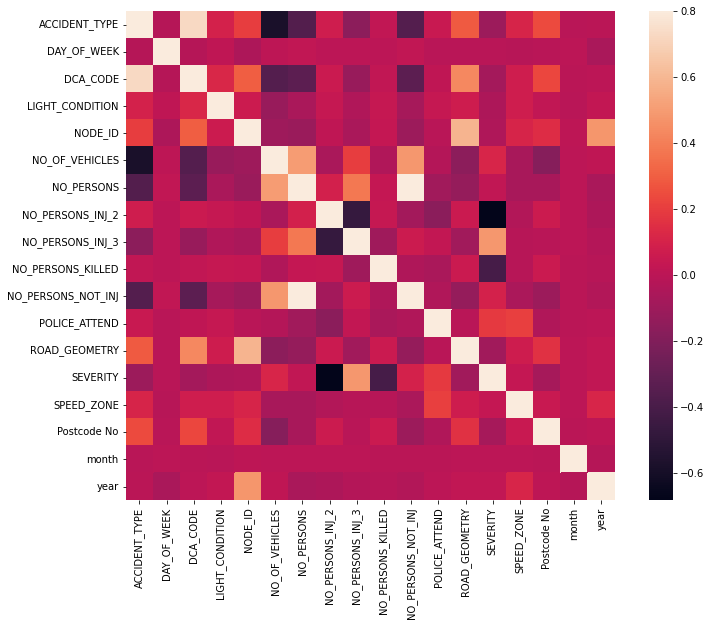

In [ ]:
# Creating a Correlation matrix
acc_corr = accident_final_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(acc_corr, vmax=.8, square=True);

In [ ]:
# SEASON ANALYSIS
accident_final_df.groupby(['season','SPEED_ZONE','SEVERITY'])[['ACCIDENT_NO']].count().nlargest(10,'ACCIDENT_NO')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


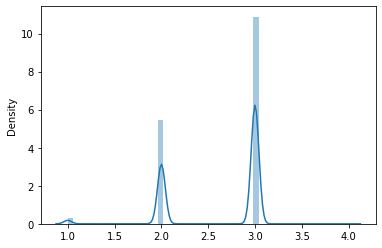

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualising severity
## It is clearly visible that most accidnets are severity 3 accidents
sns.distplot(accident_final_df[['SEVERITY']]);
fig = plt.figure()

In [ ]:
# TIME OF DAY VS SEVERITY
accident_final_df.groupby(by = ['TIME_OF_DAY','SEVERITY'],as_index=False)['ACCIDENT_NO'].count()

,TIME_OF_DAY,SEVERITY,ACCIDENT_NO
0,EARLY MORNING,1,649
1,EARLY MORNING,2,7442
2,EARLY MORNING,3,10236
3,EARLY MORNING,4,12
4,EVENING,1,1695
5,EVENING,2,32460
6,EVENING,3,65906
7,EVENING,4,35
8,MID DAY,1,1260
9,MID DAY,2,24094


In [ ]:
# Year Accidents
accident_final_df.groupby(by = ['year'],as_index=False)['ACCIDENT_NO'].count()

,year,ACCIDENT_NO
0,2000,17624
1,2001,17000
2,2002,17136
3,2003,16663
4,2004,16141
5,2005,16493
6,2006,13394
7,2007,13562
8,2008,13758
9,2009,13508


In [ ]:
# SEASON SEVERITY
accident_final_df.groupby(by = ['season','SEVERITY','TIME_OF_DAY'],as_index=False)['ACCIDENT_NO'].count().nlargest(10,'ACCIDENT_NO')

,season,SEVERITY,TIME_OF_DAY,ACCIDENT_NO
30,SPRING,3,EVENING,21871
32,SPRING,3,MORNING,17838
31,SPRING,3,MID DAY,17440
70,WINTER,3,EVENING,16785
50,SUMMER,3,EVENING,16217
72,WINTER,3,MORNING,13624
52,SUMMER,3,MORNING,12857
51,SUMMER,3,MID DAY,12755
71,WINTER,3,MID DAY,12642
11,AUTUMN,3,EVENING,11033


In [ ]:
# By SUBURB
accident_final_df.groupby(by = ['LGA_NAME'],as_index=False)[['ACCIDENT_NO']].count().nlargest(10, 'ACCIDENT_NO')

,LGA_NAME,ACCIDENT_NO
50,MELBOURNE,17829
22,CASEY,11702
26,DANDENONG,10623
31,GEELONG,10521
55,MONASH,9461
18,BRIMBANK,9273
86,YARRA RANGES,8908
39,HUME,8823
58,MORELAND,8675
17,BOROONDARA,7976


In [ ]:
# LIGHT COND VS SEVERITY
accident_final_df.groupby(by = ['SEVERITY','LIGHT_CONDITION'],as_index=False)[['ACCIDENT_NO']].count()

,SEVERITY,LIGHT_CONDITION,ACCIDENT_NO
0,1,1,3038
1,1,2,449
2,1,3,1025
3,1,4,36
4,1,5,1039
5,1,6,38
6,1,9,28
7,2,1,61573
8,2,2,7919
9,2,3,19597


In [ ]:
# ROAD CONDITION VS SEVERITY
accident_final_df.groupby(by = ['SEVERITY','ROAD_TYPE'],as_index=False)[['ACCIDENT_NO']].count().nlargest(10,'ACCIDENT_NO')

,SEVERITY,ROAD_TYPE,ACCIDENT_NO
153,3,ROAD,97736
81,2,ROAD,51731
159,3,STREET,49444
84,2,STREET,20408
129,3,HIGHWAY,17886
62,2,HIGHWAY,10481
122,3,FREEWAY,6707
99,3,AVENUE,5751
116,3,DRIVE,4806
55,2,FREEWAY,3756


In [ ]:
# Combining Person
person_concat = [person_df,person_2020_df]

In [ ]:
person_final_df = pd.concat(person_concat)

In [ ]:
person_final_df.shape

(759993, 11)

In [ ]:
# PERSON Anaysis
## Men are most involved in accidents, could be for two reasons,
## either men are mostly driving or well Women are better drivers. 
## (just my opinion: Women are better at everything)
person_final_df.groupby(by = ['Age Group','SEX'],as_index=False)[['ACCIDENT_NO']].count().nlargest(10,'ACCIDENT_NO')

,Age Group,SEX,ACCIDENT_NO
19,30-39,M,79417
22,40-49,M,63256
10,17-21,M,53877
18,30-39,F,51861
28,50-59,M,47160
13,22-25,M,45859
21,40-49,F,45030
16,26-29,M,38939
9,17-21,F,37513
27,50-59,F,32981


In [ ]:
# PERSON: Injury by age group and gender
person_final_df[person_final_df['INJ_LEVEL'] == 1].groupby(by = ['SEX','Inj Level Desc','Age Group'],as_index=False)[['ACCIDENT_NO']].count().nlargest(10,'ACCIDENT_NO')

,SEX,Inj Level Desc,Age Group,ACCIDENT_NO
20,M,Fatality,30-39,502
17,M,Fatality,17-21,431
21,M,Fatality,40-49,389
26,M,Fatality,70+,344
18,M,Fatality,22-25,322
23,M,Fatality,50-59,292
12,F,Fatality,70+,285
19,M,Fatality,26-29,271
3,F,Fatality,17-21,144
24,M,Fatality,60-64,144


In [ ]:
# Total Deaths
person_final_df[person_final_df['INJ_LEVEL'] == 1].groupby(by = ['Inj Level Desc'],as_index=False)[['ACCIDENT_NO']].count()

,Inj Level Desc,ACCIDENT_NO
0,Fatality,3548


In [ ]:
# Subsetting accident
accident_year_df = accident_final_df[['ACCIDENT_NO','year']]

In [ ]:
# PERSON WITH YEAR
person_year_df1 = person_final_df.merge(accident_year_df, how='left', on='ACCIDENT_NO')

In [ ]:
person_year_df1.drop(['POSTCODE'], axis = 1, inplace = True)
person_year_df1.dropna(inplace= True)

In [ ]:
# Changing column type
person_year_df1['INJ_LEVEL'] = pd.to_numeric(person_year_df1['INJ_LEVEL'])

In [ ]:
# Changing data type
person_year_df1['year'] = person_year_df1['year'].astype("int64")

In [ ]:
person_year_df1[person_year_df1['year'] == 2008].groupby(by=['INJ_LEVEL'])[['ACCIDENT_NO']].count()

,ACCIDENT_NO
INJ_LEVEL,
1,238
2,5545
3,10759
4,14095


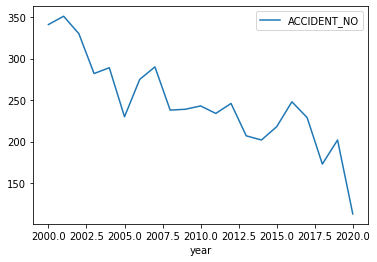

In [ ]:
## Accidents per year
person_year_df1[person_year_df1['INJ_LEVEL'] == 1].groupby(by=['year'])[['ACCIDENT_NO']].count().plot()

In [ ]:
vehicle_2020_df1 = vehicle_2020_df[['ACCIDENT_NO','VEHICLE_BODY_STYLE','VEHICLE_MAKE',"Vehicle Type Desc",'LEVEL_OF_DAMAGE','TRAFFIC_CONTROL','Traffic Control Desc' ]]

In [ ]:
vehicle_df1 = vehicle_df[['ACCIDENT_NO','VEHICLE_BODY_STYLE','VEHICLE_MAKE',"Vehicle Type Desc",'LEVEL_OF_DAMAGE','TRAFFIC_CONTROL','Traffic Control Desc' ]]

In [ ]:
vehicl_conc = [vehicle_df1, vehicle_2020_df1]

In [ ]:
vehicle_final_df = pd.concat(vehicl_conc)

In [ ]:
vehicle_final_df.groupby(by=['Vehicle Type Desc', 'Traffic Control Desc'])[['ACCIDENT_NO']].count().nlargest(10,'ACCIDENT_NO')

ACCIDENT_NO
Vehicle Type Desc Traffic Control Desc             
Car               No control                 190667
                  Stop-go lights              65790
Station Wagon     No control                  49813
Motor Cycle       No control                  31078
Utility           No control                  26219
Car               Giveway sign                20021
Bicycle           No control                  18741
Station Wagon     Stop-go lights              15132
Car               Unknown                      9202
                  Roundabout                   8604

In [ ]:
# FOR CAR COUNT
vehicle_final_df.duplicated(subset=['ACCIDENT_NO']).sum()

243863

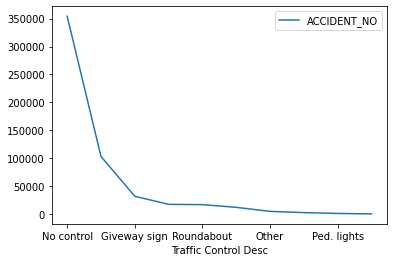

In [ ]:
vehicle_final_df.groupby(by=['Traffic Control Desc'])[['ACCIDENT_NO']].count().nlargest(10,'ACCIDENT_NO').plot()

In [ ]:
# Vehicle Make count
vehicle_final_df.groupby(by=['VEHICLE_MAKE'])[['ACCIDENT_NO']].count().nlargest(10,'ACCIDENT_NO')

,ACCIDENT_NO
VEHICLE_MAKE,
HOLDEN,87730
FORD,81713
TOYOTA,80556
,40286
MITSUB,33524
NISSAN,27348
HONDA,27058
MAZDA,24260
HYNDAI,17821


#<h1> Machine Learning
- Exploring ML models for different dataframes
- Checking for Person
- Checking for Accident
- Checking for Vehicle

## Importing ML Libraries

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [245]:
from sklearn.metrics import classification_report

In [ ]:
import xgboost as xgb

In [249]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
le = LabelEncoder()

# PERSON TRIALS
Subsetting person dataframe to use for ML
- Label Encoding
- Checking correlation
- Checking if we can predict inj level of a person given the conditions


In [ ]:
person_final_df_ml = person_final_df[['SEX','Age Group','INJ_LEVEL','SEATING_POSITION','HELMET_BELT_WORN','ROAD_USER_TYPE']]

In [ ]:
person_final_df_ml['HELMET_BELT_WORN'] = person_final_df_ml['HELMET_BELT_WORN'].astype("string")
person_final_df_ml['ROAD_USER_TYPE'] = person_final_df_ml['ROAD_USER_TYPE'].astype("string")
person_final_df_ml['SEATING_POSITION'] = person_final_df_ml['SEATING_POSITION'].astype("string")
person_final_df_ml['INJ_LEVEL'] = person_final_df_ml['INJ_LEVEL'].astype("string")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
person_final_df_ml.isnull().sum()

SEX                     0
Age Group               0
INJ_LEVEL               0
SEATING_POSITION    31714
HELMET_BELT_WORN        0
ROAD_USER_TYPE          0
dtype: int64

In [ ]:
person_final_df_ml.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
person_final_df_ml['SEX']= le.fit_transform(person_final_df_ml['SEX'])
person_final_df_ml['Age Group']= le.fit_transform(person_final_df_ml['Age Group'])
person_final_df_ml['SEATING_POSITION']= le.fit_transform(person_final_df_ml['SEATING_POSITION'])
person_final_df_ml['HELMET_BELT_WORN']= le.fit_transform(person_final_df_ml['HELMET_BELT_WORN'])
person_final_df_ml['ROAD_USER_TYPE']= le.fit_transform(person_final_df_ml['ROAD_USER_TYPE'])
person_final_df_ml['INJ_LEVEL']= le.fit_transform(person_final_df_ml['INJ_LEVEL'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [236]:
# Checking correlation for injury level
person_final_df_ml.corr()

,SEX,Age Group,INJ_LEVEL,SEATING_POSITION,HELMET_BELT_WORN,ROAD_USER_TYPE
SEX,1.000000,0.152495,0.111648,-0.053373,0.202868,0.170567
Age Group,0.152495,1.000000,0.027702,-0.090082,0.083735,0.058304
INJ_LEVEL,0.111648,0.027702,1.000000,0.057587,-0.030309,-0.110009
SEATING_POSITION,-0.053373,-0.090082,0.057587,1.000000,-0.011488,0.189250
HELMET_BELT_WORN,0.202868,0.083735,-0.030309,-0.011488,1.000000,0.318950
ROAD_USER_TYPE,0.170567,0.058304,-0.110009,0.189250,0.318950,1.000000


In [237]:
X = person_final_df_ml.loc[:,person_final_df_ml.columns != 'INJ_LEVEL']
y = person_final_df_ml.loc[:,person_final_df_ml.columns == 'INJ_LEVEL']

In [238]:
X_train_person, X_test_person, y_train_person, y_test_person = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [241]:
clf = LogisticRegression(random_state=0).fit(X_train_person, y_train_person)
clf.score(X_train_person,y_train_person)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5100862822099368

In [243]:
y_pred_clf = clf.predict(X_test_person)
accuracy_score(y_test_person, y_pred_clf)

0.5096734772340309

 Our accuracy score is 51% which is not acceptable.

In [248]:
print(classification_report(y_test_person,y_pred_clf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00      1035
           2       0.00      0.00      0.00     21454
           3       0.46      0.46      0.46     52900
           4       0.54      0.71      0.61     70263

    accuracy                           0.51    145656
   macro avg       0.20      0.23      0.21    145656
weighted avg       0.43      0.51      0.46    145656



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## XGBOOST

In [ ]:
model = xgb.XGBRegressor().fit(X_train_person, y_train_person)

[07:40:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_test_person = y_test_person.to_numpy()

In [ ]:
xgb_pred = model.predict(X_test_person)
model.score(X_train_person,y_train_person)

0.14628231560846494

In [ ]:
rmse = np.sqrt(mean_squared_error(xgb_pred,y_test_person))
print("RMSE: %f" % (rmse))

RMSE: 0.687291


## RANDOM FOREST

In [250]:
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
model_rfc = rnd_clf.fit(X_train_person, y_train_person)
rnd_clf.score(X_train_person, y_train_person)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.5565914836867065

In [252]:
y_test1 = y_test_person.to_numpy()
y_test1 = y_test1.reshape(-1, 1)
y_pred_rfc = model_rfc.predict(X_test_person)

In [253]:
print(classification_report(y_test_person,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00      1035
           2       0.00      0.00      0.00     21454
           3       0.50      0.49      0.50     52900
           4       0.59      0.78      0.67     70263

    accuracy                           0.56    145656
   macro avg       0.22      0.26      0.23    145656
weighted avg       0.47      0.56      0.51    145656



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random forest gives no different result

# ACCIDENT ML MODELS
Subsetting person dataframe to use for ML
- Label Encoding
- Checking correlation
- Checking if we can predict injury level of a person given the conditions

### LOGISTIC REGRESSION 

In [256]:
accident_final_df_ml = accident_final_df.drop(['ACCIDENT_NO','ACCIDENTDATE','ACCIDENTTIME','EDITION','Accident Type Desc','Day Week Description','DCA Description','DIRECTORY','PAGE', 'GRID_REFERENCE_X','GRID_REFERENCE_Y','Light Condition Desc','NODE_ID','Road Geometry Desc','Postcode No'],axis = 1)

In [257]:
# Assigning numerical values and storing in another column
accident_final_df_ml['ROAD_TYPE'] = le.fit_transform(accident_final_df_ml['ROAD_TYPE'])
accident_final_df_ml['LGA_NAME'] = le.fit_transform(accident_final_df_ml['LGA_NAME'])
accident_final_df_ml['TIME_OF_DAY'] = le.fit_transform(accident_final_df_ml['TIME_OF_DAY'])
accident_final_df_ml['season'] = le.fit_transform(accident_final_df_ml['season'])


In [258]:
# split into train test sets
X = accident_final_df_ml.loc[:, accident_final_df_ml.columns != 'SEVERITY']
y = accident_final_df_ml.loc[:, accident_final_df_ml.columns == 'SEVERITY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [259]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8126969702022644

In [260]:
y_pred_clf = clf.predict(X_test)
accuracy_score(y_test, y_pred_clf)

0.8123426322722649

In [261]:
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           1       0.03      0.02      0.02      1159
           2       0.88      0.56      0.69     19691
           3       0.81      0.96      0.88     39092
           4       0.00      0.00      0.00        29

    accuracy                           0.81     59971
   macro avg       0.43      0.39      0.40     59971
weighted avg       0.82      0.81      0.80     59971



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RANDOM FOREST

In [262]:
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
model_rfc = rnd_clf.fit(X_train, y_train)
rnd_clf.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9396333227726734

In [263]:
y_test1 = y_test.to_numpy()
y_test1 = y_test1.reshape(-1, 1)

In [264]:
y_pred_rfc = model_rfc.predict(X_test)

In [265]:
y_pred_rfc = y_pred_rfc.reshape(-1, 1)

In [266]:
accuracy_score(y_pred_rfc, y_test1)

0.9383368628170282

In [267]:
rmse = np.sqrt(mean_squared_error(y_pred_rfc,y_test1))
print("RMSE: %f" % (rmse))

RMSE: 0.248321


In [269]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1159
           2       0.91      0.91      0.91     19691
           3       0.95      0.95      0.95     39092
           4       0.00      0.00      0.00        29

    accuracy                           0.94     59971
   macro avg       0.71      0.71      0.71     59971
weighted avg       0.94      0.94      0.94     59971



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here we can observe than Random forest performs well, therefore it is by far the best fit

### XGBOOST

In [270]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [271]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [273]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[10:17:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [274]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse * 100))

RMSE: 84.771877


### **ENSEMBLE**

In [ ]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVER

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model = VotingClassifier(estimators=[('dt', model1), ('knn', model2),('lr', model3)], voting='soft')
model.fit(X_train,y_train)
pred_vclf = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [ ]:
accuracy_score(pred_vclf,y_test)

0.8730553100665321

In [277]:
print(classification_report(y_test,pred_vclf))

              precision    recall  f1-score   support

           1       1.00      0.30      0.46      1140
           2       0.85      0.77      0.81     19626
           3       0.88      0.94      0.91     39174
           4       1.00      0.03      0.06        31

    accuracy                           0.87     59971
   macro avg       0.93      0.51      0.56     59971
weighted avg       0.87      0.87      0.87     59971



Here we can see that precision is high for Ensamble, second only to Random Forest

# VEHICLE TRIALS

In [ ]:
vehicle_df_ml = vehicle_final_df

In [ ]:
vehicle_df_ml['VEHICLE_BODY_STYLE'] = vehicle_df_ml['VEHICLE_BODY_STYLE'].astype("string")
vehicle_df_ml['VEHICLE_MAKE'] = vehicle_df_ml['VEHICLE_MAKE'].astype("string")
vehicle_df_ml['Vehicle Type Desc'] = vehicle_df_ml['Vehicle Type Desc'].astype("string")
vehicle_df_ml['TRAFFIC_CONTROL'] = vehicle_df_ml['TRAFFIC_CONTROL'].astype("string")
vehicle_df_ml['Traffic Control Desc'] = vehicle_df_ml['Traffic Control Desc'].astype("string")

In [ ]:
vehicle_df_ml.drop(columns=['ACCIDENT_NO'], axis=1, inplace= True)

In [ ]:
vehicle_df_ml['VEHICLE_BODY_STYLE'] = le.fit_transform(vehicle_df_ml['VEHICLE_BODY_STYLE'])
vehicle_df_ml['VEHICLE_MAKE'] = le.fit_transform(vehicle_df_ml['VEHICLE_MAKE'])
vehicle_df_ml['Vehicle Type Desc'] = le.fit_transform(vehicle_df_ml['Vehicle Type Desc'])
vehicle_df_ml['TRAFFIC_CONTROL'] = le.fit_transform(vehicle_df_ml['TRAFFIC_CONTROL'])
vehicle_df_ml['Traffic Control Desc'] = le.fit_transform(vehicle_df_ml['Traffic Control Desc'])


In [278]:
X = vehicle_df_ml.loc[:, vehicle_df_ml.columns != 'LEVEL_OF_DAMAGE']
y = vehicle_df_ml.loc[:, vehicle_df_ml.columns == 'LEVEL_OF_DAMAGE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## ENSEMBLE

In [ ]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

model = VotingClassifier(estimators=[('dt', model1), ('knn', model2),('lr', model3)], voting='soft')
model.fit(X_train,y_train)
pred_vehicle = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVER

In [ ]:
accuracy_score(pred_vehicle,y_test)

0.2294437809904848

##XGBOOST

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[07:46:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 2.262373


## Logistic Regression

In [279]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.21702902773749536

## Random Forest

In [280]:
model_rfc = rnd_clf.fit(X_train, y_train)
rnd_clf.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.2589618971980603